**Cau 2**

In [9]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/AI_THI

/content/drive/MyDrive/AI_THI


In [11]:
import cv2
import argparse
import numpy as np
from google.colab.patches import cv2_imshow

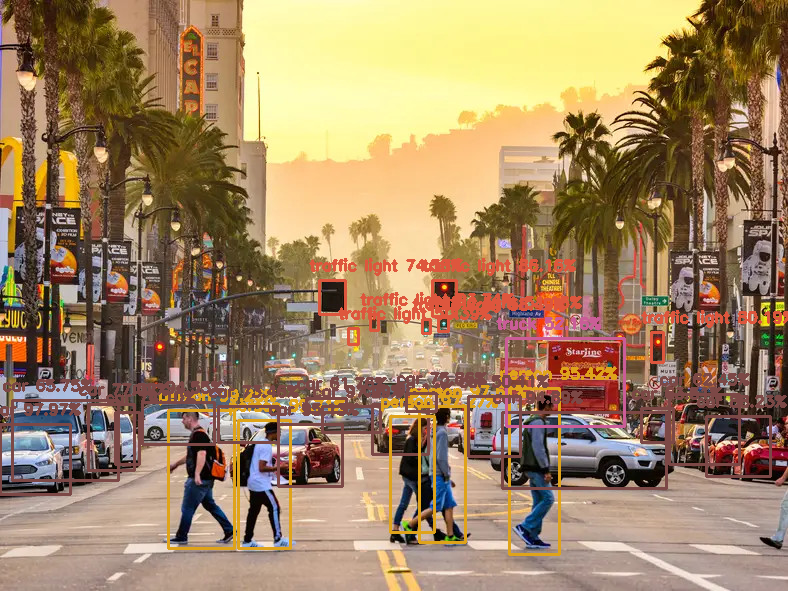

In [18]:
def get_output_layers(net):
    layer_names = net.getLayerNames()

    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
 
    return output_layers
 
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
    ptcofi= float(confidence*100)
    cofi=format(ptcofi, ".2f")
    label = str(classes[class_id])+" " + str(cofi)+"%"
 
    color = COLORS[class_id]
 
    cv2.rectangle(img, (x, y), (x_plus_w, y_plus_h), color, 2)
 
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
 
# Ảnh test
image = cv2.imread('/content/drive/MyDrive/AI_THI/de2_c2.jpg')
 
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392
 
classes = None
# Đường dẫn đến file yolov3.txt trong google drive
with open('/content/drive/MyDrive/lbr/object-detection-opencv/yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
# Đường dẫn đến file yolov3.weights trong google drive
# Đường dẫn đến file yolov3.cfg trong google drive
net = cv2.dnn.readNet('/content/drive/MyDrive/lbr/object-detection-opencv/yolov3.weights', '/content/drive/MyDrive/lbr/object-detection-opencv/yolov3.cfg')
 
blob = cv2.dnn.blobFromImage(image, scale, (416, 416), (0, 0, 0), True, crop=False)
 
net.setInput(blob)
 
outs = net.forward(get_output_layers(net))
 
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4
 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])
 
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
 
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x + w), round(y + h))
 
cv2_imshow(image)